<a href="https://colab.research.google.com/github/jomscan/CEIABDTA/blob/main/Actividad_3_2_%E2%80%93_Comparativa_clasificadores_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JONATHAN MARTIN SANCHEZ**

**Dataset IRIS**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    Esta función pinta la matriz de confusión.
    Puede normalizar estableciendo `normalize=True`.
    """
    if not title:
        title = 'Normalized confusion matrix' if normalize else 'Confusion matrix'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargamos el dataset Iris desde seaborn
iris = sns.load_dataset('iris')

# X = características, y = etiqueta (species)
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# División en entrenamiento (67%) y test (33%)
Xtrain_i, Xtest_i, ytrain_i, ytest_i = train_test_split(
    X_iris, y_iris,
    test_size=0.33,
    random_state=1
)

# Array de nombres de clase (lo usaremos en la matriz de confusión)
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])



=== GaussianNB ===
Precisión: 0.94


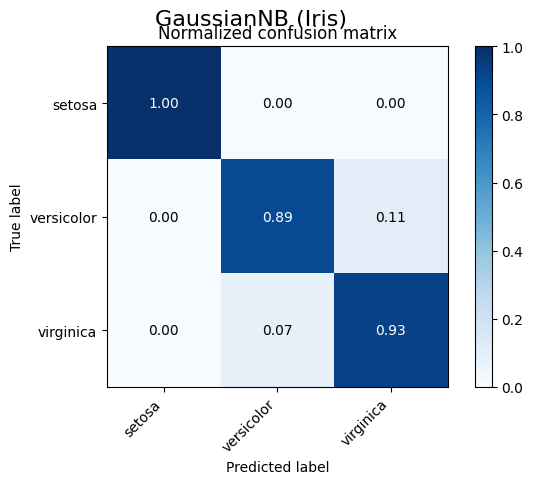


=== MultinomialNB ===
Precisión: 0.64


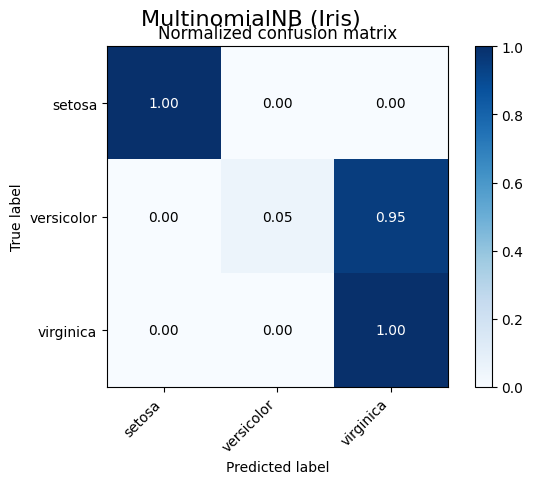


=== BernoulliNB ===
Precisión: 0.28


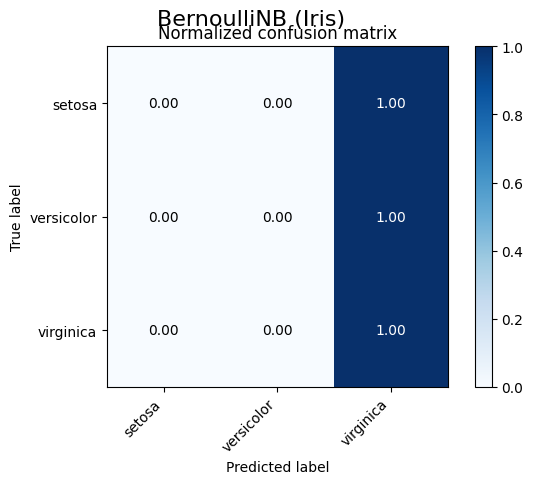


=== CategoricalNB ===
Precisión: 0.98


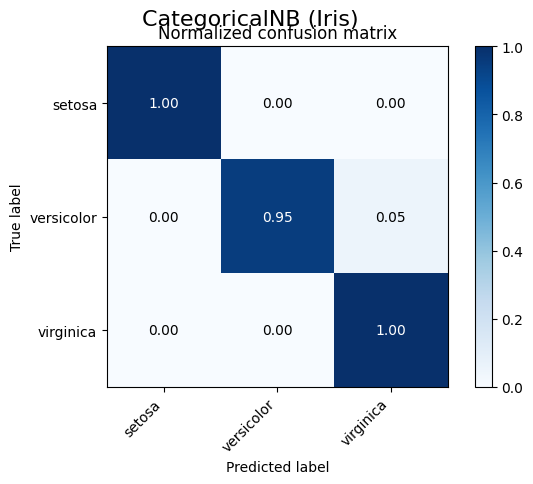


=== ComplementNB ===
Precisión: 0.62


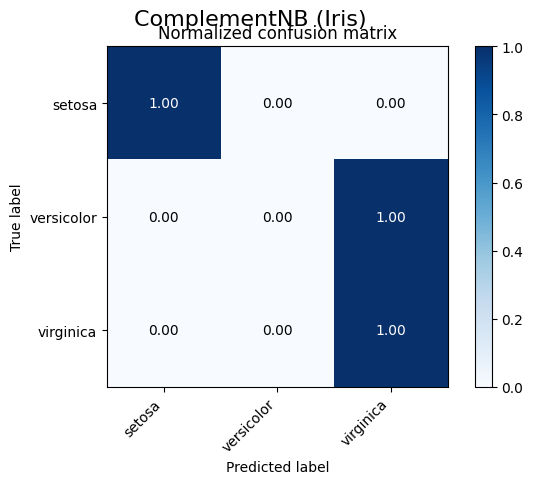


== Resumen de precisiones (Iris) ==

GaussianNB: 0.94
MultinomialNB: 0.64
BernoulliNB: 0.28
CategoricalNB: 0.98
ComplementNB: 0.62


In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB

# Diccionario con cada clasificador que queremos comparar
clasificadores_nb = {
    'GaussianNB':     GaussianNB(),
    'MultinomialNB':  MultinomialNB(),
    'BernoulliNB':    BernoulliNB(),
    'CategoricalNB':  CategoricalNB(),
    'ComplementNB':   ComplementNB()
}

resultados_iris = {}

for nombre, clf in clasificadores_nb.items():
    # Entrenamos
    clf.fit(Xtrain_i, ytrain_i)
    # Predecimos
    y_pred = clf.predict(Xtest_i)
    # Calculamos precisión
    acc = accuracy_score(ytest_i, y_pred)

    resultados_iris[nombre] = acc

    # Imprimimos por pantalla
    print(f"\n=== {nombre} ===")
    print(f"Precisión: {acc:.2f}")

    # Convertir ytest e y_pred a valores numéricos (0,1,2) para utilizar la función plot_confusion_matrix
    mapping = {'setosa':0, 'versicolor':1, 'virginica':2}
    y_true_num = ytest_i.map(mapping).values
    y_pred_num = pd.Series(y_pred).map(mapping).values

    # Pintamos la matriz de confusión normalizada
    plot_confusion_matrix(
        y_true_num,
        y_pred_num,
        classes=clases_iris,
        normalize=True,
        title='Normalized confusion matrix',
        titleSup=f"{nombre} (Iris)"
    )
    plt.show()

# Mostramos un pequeño resumen final
print("\n== Resumen de precisiones (Iris) ==\n")
for nombre, acc in resultados_iris.items():
    print(f"{nombre}: {acc:.2f}")


**Dataset PENGUIN**

<ipython-input-11-8adea379abce>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Xtrain_p_cat[col].fillna(0, inplace=True)
<ipython-input-11-8adea379abce>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df


=== GaussianNB ===
Precisión: 0.96


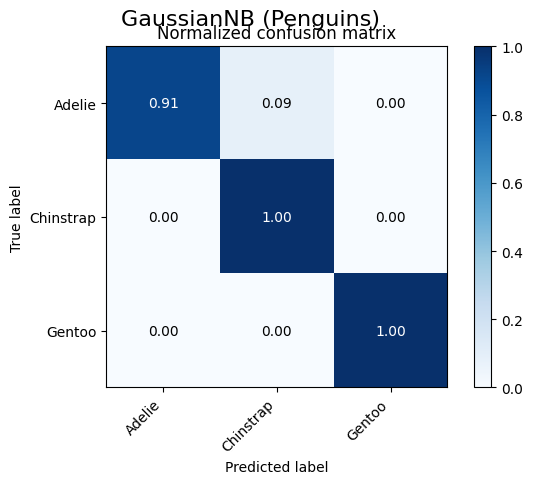


=== MultinomialNB ===
Precisión: 0.79


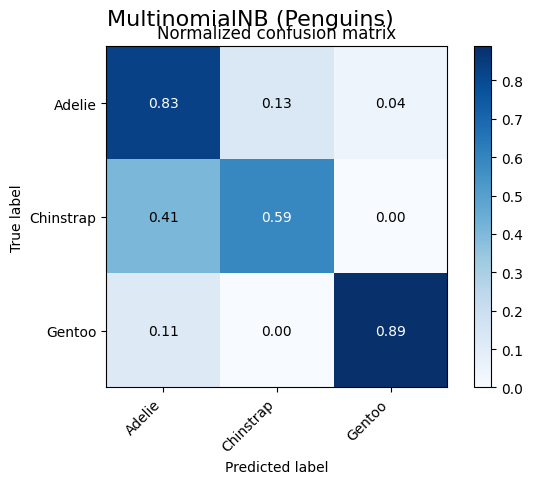


=== BernoulliNB ===
Precisión: 0.65


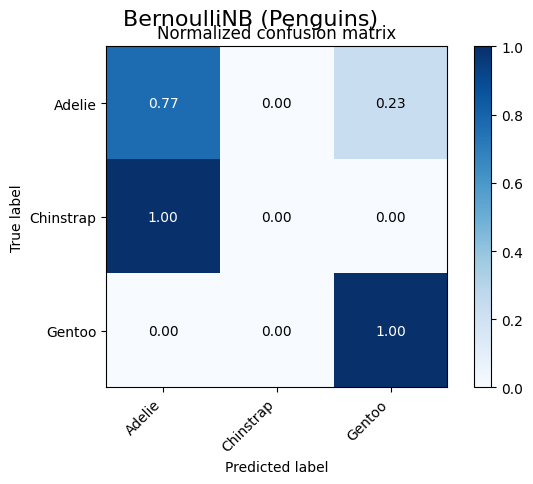


=== ComplementNB ===
Precisión: 0.65


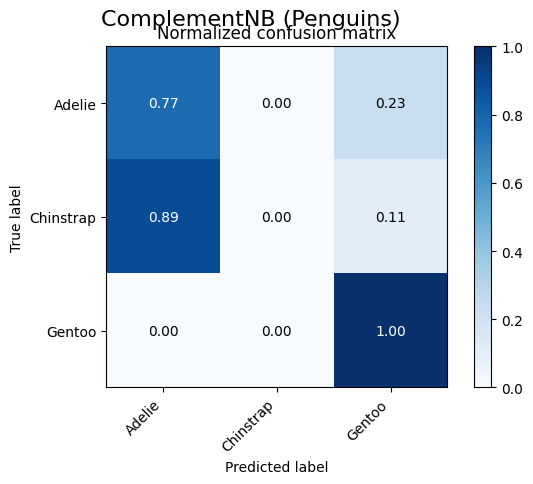


=== CategoricalNB ===
Precisión: 0.97


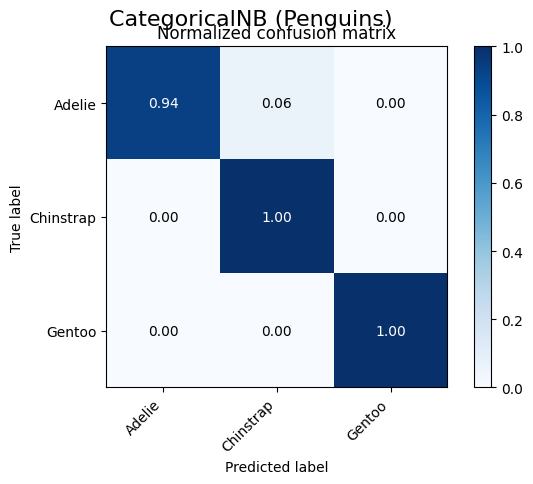


== Resumen de precisiones (Penguins) ==

GaussianNB: 0.96
MultinomialNB: 0.79
BernoulliNB: 0.65
ComplementNB: 0.65
CategoricalNB: 0.97


In [11]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1) Cargamos el dataset Penguins desde seaborn
penguins = sns.load_dataset('penguins')

# Quitamos filas con valores nulos
penguins.dropna(inplace=True)

# Convertimos las columnas categóricas (island, sex) a enteros
penguins['island'] = penguins['island'].astype('category').cat.codes
penguins['sex']    = penguins['sex'].astype('category').cat.codes

# X = características, y = etiqueta (species)
X_peng = penguins.drop('species', axis=1)
y_peng = penguins['species']

# 2) División en train (67%) y test (33%)
Xtrain_p, Xtest_p, ytrain_p, ytest_p = train_test_split(
    X_peng, y_peng, test_size=0.33, random_state=1
)

# 3) Para CategoricalNB, discretizamos SOLO en copias
Xtrain_p_cat = Xtrain_p.copy()
Xtest_p_cat  = Xtest_p.copy()

# Columnas numéricas que queremos discretizar
cols_continuas = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

for col in cols_continuas:
    # Discretizamos en el TRAIN con q=5 intervalos
    # labels=False => produce valores enteros 0..(n-1), NO categories
    Xtrain_p_cat[col], bins = pd.qcut(
        Xtrain_p_cat[col],
        q=5,
        duplicates='drop',
        retbins=True,
        labels=False  # obtenemos directamente códigos
    )

    # Aplicamos los mismos bins al TEST
    Xtest_p_cat[col] = pd.cut(
        Xtest_p_cat[col],
        bins=bins,
        include_lowest=True,
        labels=False
    )

    # Rellenamos NaN => 0 (o podrías usar la categoría más alta)
    Xtrain_p_cat[col].fillna(0, inplace=True)
    Xtest_p_cat[col].fillna(0, inplace=True)

    # Aseguramos que todo es entero y >= 0
    Xtrain_p_cat[col] = Xtrain_p_cat[col].astype(int)
    Xtest_p_cat[col]  = Xtest_p_cat[col].astype(int)

# Clases en Penguins (para la matriz de confusión)
clases_peng = np.array(['Adelie', 'Chinstrap', 'Gentoo'])

# 4) Importamos y definimos clasificadores Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB

clasificadores_nb = {
    'GaussianNB':     GaussianNB(),
    'MultinomialNB':  MultinomialNB(),
    'BernoulliNB':    BernoulliNB(),
    'ComplementNB':   ComplementNB(),
    'CategoricalNB':  CategoricalNB()
}

resultados_peng = {}

# 5) Entrenamos y evaluamos cada modelo
for nombre, clf in clasificadores_nb.items():
    print(f"\n=== {nombre} ===")

    if nombre == 'CategoricalNB':
        # Para CategoricalNB, entrenamos y predecimos la versión discretizada
        clf.fit(Xtrain_p_cat, ytrain_p)
        y_pred = clf.predict(Xtest_p_cat)
    else:
        # Para el resto, usamos el dataset original con variables continuas
        clf.fit(Xtrain_p, ytrain_p)
        y_pred = clf.predict(Xtest_p)

    # Precisión
    acc = accuracy_score(ytest_p, y_pred)
    resultados_peng[nombre] = acc
    print(f"Precisión: {acc:.2f}")

    # Pintamos la matriz de confusión normalizada
    mapping = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
    y_true_num = ytest_p.map(mapping).values
    y_pred_num = pd.Series(y_pred).map(mapping).values

    plot_confusion_matrix(
        y_true_num,
        y_pred_num,
        classes=clases_peng,
        normalize=True,
        title='Normalized confusion matrix',
        titleSup=f"{nombre} (Penguins)"
    )
    plt.show()

# 6) Resumen final de precisiones
print("\n== Resumen de precisiones (Penguins) ==\n")
for nombre, acc in resultados_peng.items():
    print(f"{nombre}: {acc:.2f}")
